In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from time import process_time
from sklearn.ensemble import RandomForestClassifier

# 1.Read Data File

In [2]:
dataframe = pd.read_csv("Data File/final_model_data.csv")
dataframe = dataframe.rename(columns={'mandeath':'target'})
dataframe = dataframe.drop('Unnamed: 0',axis=1)
dataframe = dataframe.drop('index',axis=1)

sample_data = dataframe.sample(frac=0.1)

y = sample_data['target']
X=sample_data.drop('target',axis=1)
X=X.drop('IX',axis=1)
X=X.drop('X',axis=1)
X=X.drop('XIX',axis=1)
X=X.drop('XX',axis=1)

# 2. Split Data File

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 3. Training

## 3.1 Decision Tree


Computational Time: %.3e 0.2085790000000003
Score: 

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86     10439
         1.0       0.86      0.85      0.85     10359

    accuracy                           0.85     20798
   macro avg       0.85      0.85      0.85     20798
weighted avg       0.85      0.85      0.85     20798

Matthew Corr: 

0.707497726992451


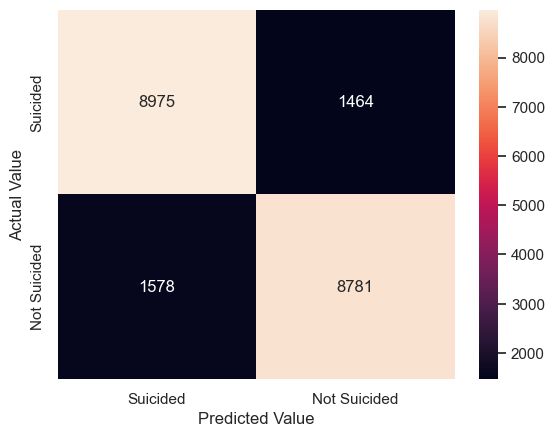

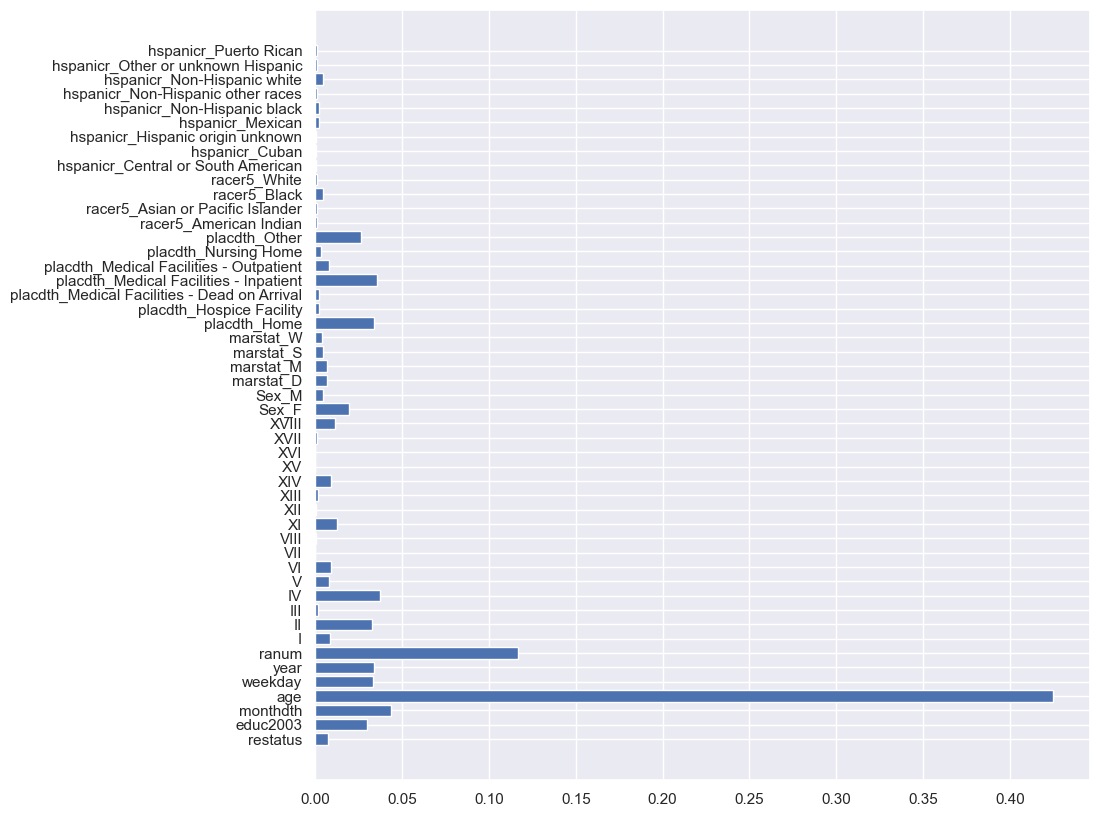

In [4]:
start = process_time()
DecisionTree = tree.DecisionTreeClassifier(random_state=12)
DecisionTree = DecisionTree.fit(X_train, y_train)
end = process_time()
y_pred = DecisionTree.predict(X_test)
DecisionTree.score(X_test, y_test, sample_weight=None)


cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
df=pd.DataFrame(cnf_matrix,index=["Suicided", "Not Suicided"],columns=["Suicided","Not Suicided"])
sns.heatmap(df,annot=True, fmt ='g')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

print('Computational Time: %.3e', end-start)
print('Score: \n')
print(metrics.classification_report(y_test, y_pred))
print('Matthew Corr: \n')
print(metrics.matthews_corrcoef(y_test,y_pred))


vector = np.vectorize(np.float_)
feature_names = X_train.columns.tolist()
importance = DecisionTree.feature_importances_
plt.figure(figsize=(10,10))
plt.barh([x for x in feature_names], importance)
plt.show()

# 3.2 RandomForest

Computational Time: %.3e 2.573614
Score: 

              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91     10439
         1.0       0.89      0.93      0.91     10359

    accuracy                           0.91     20798
   macro avg       0.91      0.91      0.91     20798
weighted avg       0.91      0.91      0.91     20798

Matthew Corr: 

0.8205458332550742


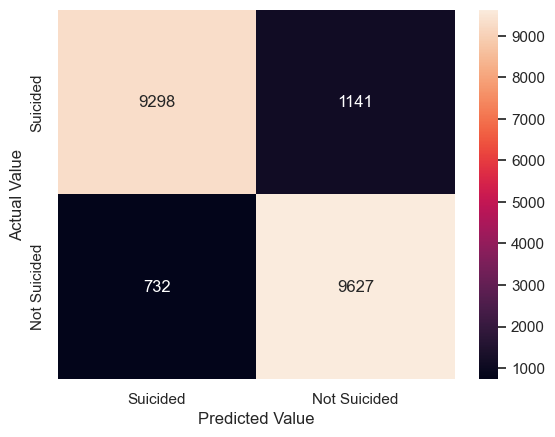

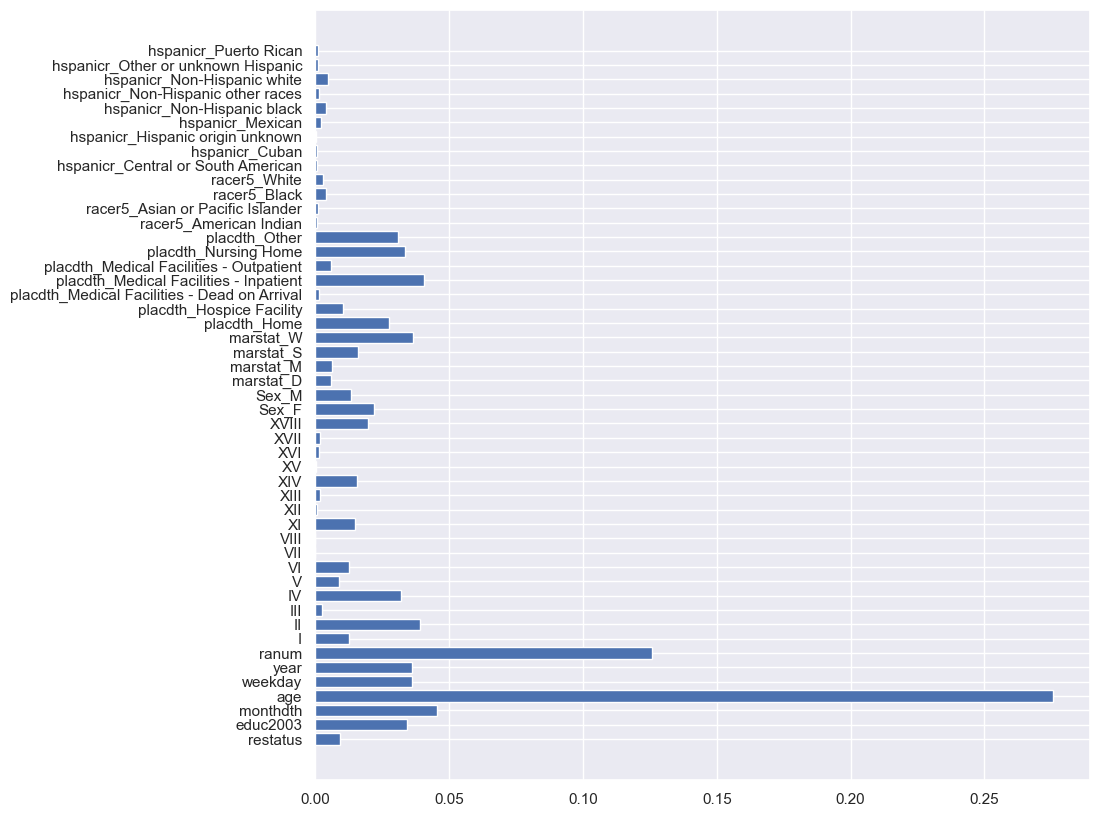

In [5]:
start = process_time()
RandomForest = RandomForestClassifier(random_state=12)
RandomForest = RandomForest.fit(X_train, y_train)
end = process_time()
y_pred = RandomForest.predict(X_test)
RandomForest.score(X_test, y_test, sample_weight=None)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
df=pd.DataFrame(cnf_matrix,index=["Suicided", "Not Suicided"],columns=["Suicided","Not Suicided"])
sns.heatmap(df,annot=True, fmt ='g')

plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

print('Computational Time: %.3e', end-start)
print('Score: \n')
print(metrics.classification_report(y_test, y_pred))
print('Matthew Corr: \n')
print(metrics.matthews_corrcoef(y_test,y_pred))

vector = np.vectorize(np.float_)
feature_names = X_train.columns.tolist()
importance = RandomForest.feature_importances_
plt.figure(figsize=(10,10))
plt.barh([x for x in feature_names], importance)
plt.show()



## 3.2 Logistic Regression

Computational Time: %.3e 0.31676899999999897
Score: 

              precision    recall  f1-score   support

         0.0       0.91      0.86      0.89     10439
         1.0       0.87      0.92      0.89     10359

    accuracy                           0.89     20798
   macro avg       0.89      0.89      0.89     20798
weighted avg       0.89      0.89      0.89     20798

Matthew Corr: 

0.783289099569701


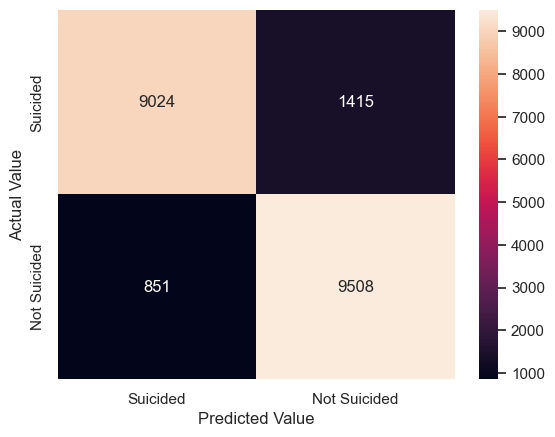

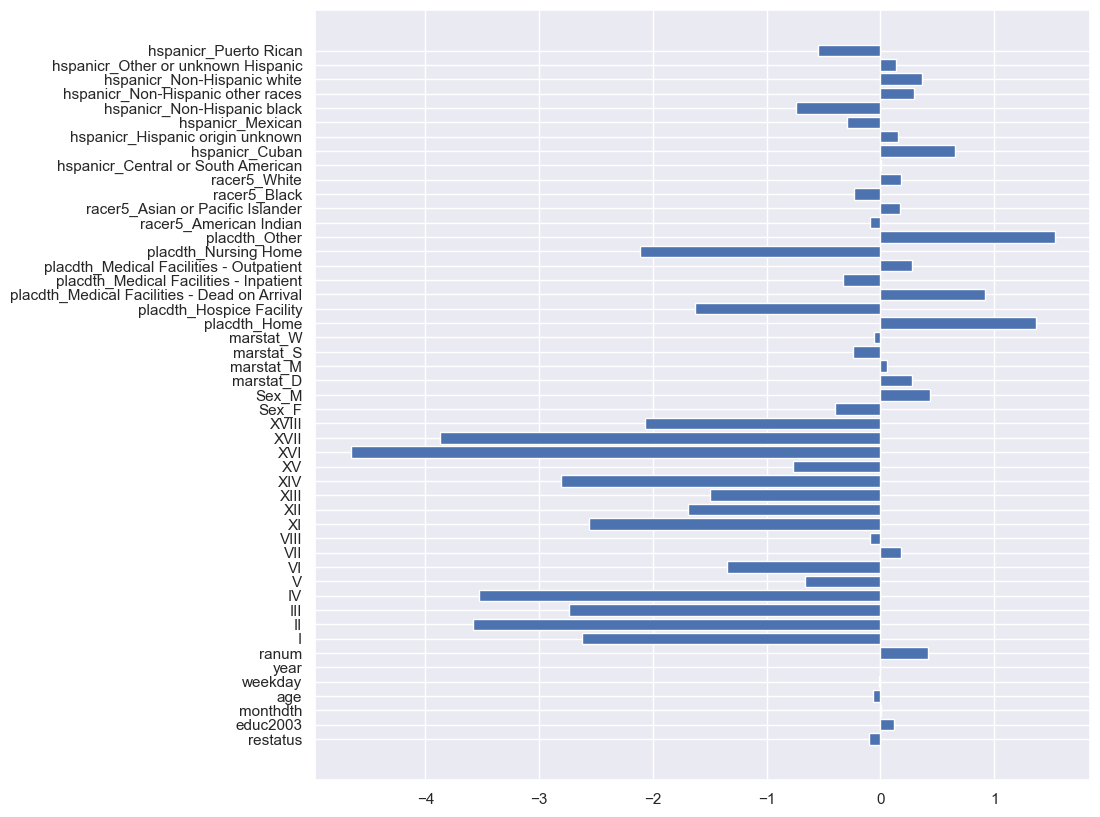

In [6]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
start=process_time()
logreg = LogisticRegression(solver='liblinear',random_state=16)


# fit the model with data
logreg.fit(X_train, y_train)
end = process_time()

y_pred = logreg.predict(X_test)
logreg.score(X_test, y_test, sample_weight=None)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
df=pd.DataFrame(cnf_matrix,index=["Suicided", "Not Suicided"],columns=["Suicided","Not Suicided"])
sns.heatmap(df,annot=True, fmt ='g')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

print('Computational Time: %.3e', end-start)
print('Score: \n')
print(metrics.classification_report(y_test, y_pred))
print('Matthew Corr: \n')
print(metrics.matthews_corrcoef(y_test,y_pred))

vector = np.vectorize(np.float_)
feature_names = X_train.columns.tolist()
importance = logreg.coef_[0]
importance = vector(importance)
plt.figure(figsize=(10,10))
plt.barh([x for x in feature_names], importance)
plt.show()

## 3.3 KNN

Computational Time: %.3e 0.02379799999999932
Score: 

              precision    recall  f1-score   support

         0.0       0.77      0.82      0.79     10439
         1.0       0.81      0.75      0.78     10359

    accuracy                           0.78     20798
   macro avg       0.79      0.78      0.78     20798
weighted avg       0.79      0.78      0.78     20798

Matthew Corr: 

0.5703658751056488


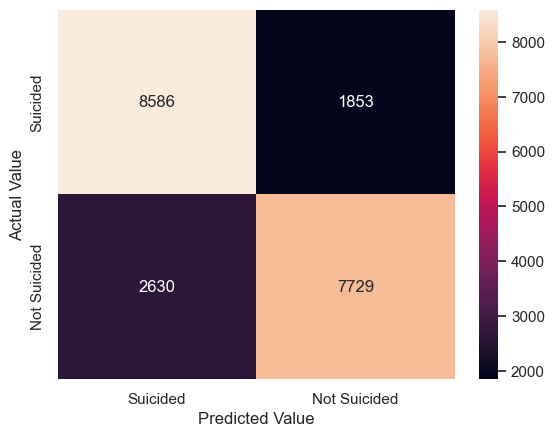

In [7]:
from sklearn.neighbors import KNeighborsClassifier
start= process_time()
knn = KNeighborsClassifier(n_neighbors=2,n_jobs=-1)
knn.fit(X_train, y_train)
end = process_time()
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
df=pd.DataFrame(cnf_matrix,index=["Suicided", "Not Suicided"],columns=["Suicided","Not Suicided"])
sns.heatmap(df,annot=True, fmt ='g')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

print('Computational Time: %.3e', end-start)

print('Score: \n')
print(metrics.classification_report(y_test, y_pred))
print('Matthew Corr: \n')
print(metrics.matthews_corrcoef(y_test,y_pred))

## 3.5 Naive Bayes

Score: 

              precision    recall  f1-score   support

         0.0       0.80      0.87      0.84     10439
         1.0       0.86      0.79      0.82     10359

    accuracy                           0.83     20798
   macro avg       0.83      0.83      0.83     20798
weighted avg       0.83      0.83      0.83     20798

Matthew Corr: 

0.6597762294999324


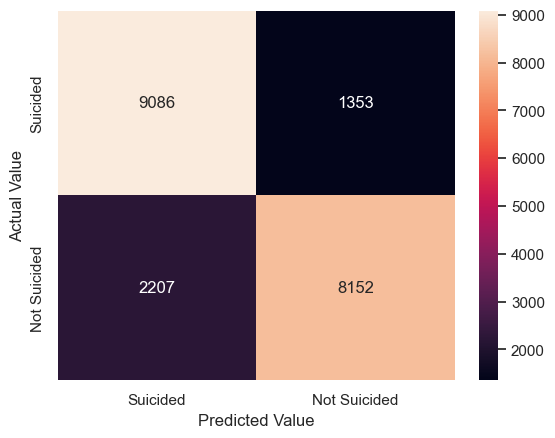

In [8]:
from sklearn.naive_bayes import MultinomialNB
start= process_time()
muNB = MultinomialNB()
muNB.fit(X_train, y_train)
end= process_time()
y_pred = muNB.predict(X_test)
muNB.score(X_test, y_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
df=pd.DataFrame(cnf_matrix,index=["Suicided", "Not Suicided"],columns=["Suicided","Not Suicided"])
sns.heatmap(df,annot=True, fmt ='g')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

print('Score: \n')
print(metrics.classification_report(y_test, y_pred))
print('Matthew Corr: \n')
print(metrics.matthews_corrcoef(y_test,y_pred))

## 3.6 ComplementNB

Computational Time: %.3e 0.4850550000000027
Score: 

              precision    recall  f1-score   support

         0.0       0.80      0.87      0.84     10439
         1.0       0.86      0.79      0.82     10359

    accuracy                           0.83     20798
   macro avg       0.83      0.83      0.83     20798
weighted avg       0.83      0.83      0.83     20798

Matthew Corr: 

0.6595020584324399


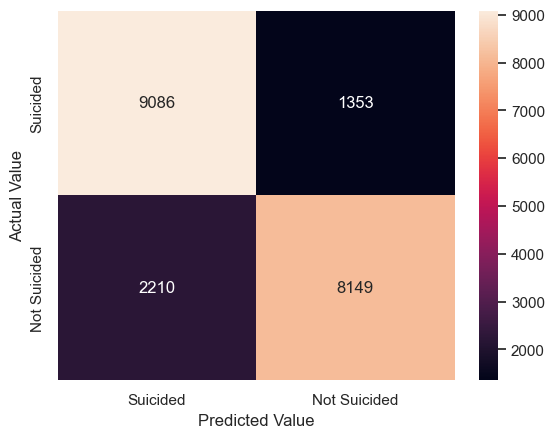

In [9]:
from sklearn.naive_bayes import ComplementNB
start = process_time()
cmNB = ComplementNB()
cmNB.fit(X_train, y_train)
end = process_time()
y_pred = cmNB.predict(X_test)
cmNB.score(X_test, y_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
df=pd.DataFrame(cnf_matrix,index=["Suicided", "Not Suicided"],columns=["Suicided","Not Suicided"])
sns.heatmap(df,annot=True, fmt ='g')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

print('Computational Time: %.3e', end-start)
print('Score: \n')
print(metrics.classification_report(y_test, y_pred))
print('Matthew Corr: \n')
print(metrics.matthews_corrcoef(y_test,y_pred))

# Cross-validation

Decision Tree Cross-Validation for hyperparameter tuning

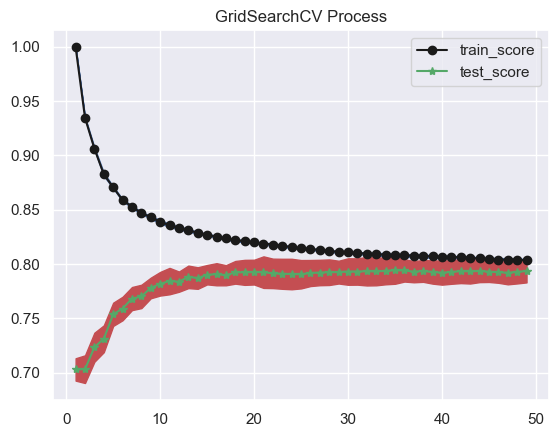

Best Parameter:  {'min_samples_leaf': 35}
CV Best Score:  0.7941248246556497
Accuracy on test set:  0.8971054909125877
MCC on test set:  0.7955161090364027


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

min_samples_leaf = np.arange(1,50)

parameters = {'min_samples_leaf': min_samples_leaf}

clf = GridSearchCV(DecisionTreeClassifier(),parameters,cv=10,scoring=metrics.make_scorer(metrics.matthews_corrcoef),n_jobs=-1, return_train_score=True)
clf.fit(X_train,y_train)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.fill_between(min_samples_leaf,clf.cv_results_['mean_train_score']+clf.cv_results_['std_train_score'],
                 clf.cv_results_['mean_train_score']-clf.cv_results_['std_train_score'],color='b')
ax.fill_between(min_samples_leaf,clf.cv_results_['mean_test_score']+clf.cv_results_['std_test_score'],
                 clf.cv_results_['mean_test_score']-clf.cv_results_['std_test_score'],color='r')
ax.plot(min_samples_leaf,clf.cv_results_['mean_train_score'],'ko-',label ="train_score")
ax.plot(min_samples_leaf,clf.cv_results_['mean_test_score'],'g*-',label = 'test_score')
plt.legend()
plt.title('GridSearchCV Process')
plt.show()


print('Best Parameter: ', clf.best_params_)
print('CV Best Score: ', clf.best_score_)

#Get best model
best_model = clf.best_estimator_
print('Accuracy on test set: ', best_model.score(X_test,y_test))
y_pred = best_model.predict(X_test)
print('MCC on test set: ', metrics.matthews_corrcoef(y_test,y_pred))




Random Forest

In [15]:
from sklearn.model_selection import RandomizedSearchCV

def NPV(y_true, y_pred):
    cm = confusion_matrix(y_true,y_pred)
    
    score = cm[0][0]/(cm[0][0]+cm[1][0])
    return score
 
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

clf = RandomizedSearchCV(RandomForestClassifier(random_state=12),param_distributions=random_grid,cv=3,scoring=metrics.make_scorer(NPV),n_jobs=-1, return_train_score=True, verbose=1)
clf.fit(X_train,y_train)

print('Best Parameter: ', clf.best_params_)
print('CV Best Score: ', clf.best_score_)

#Get best model
best_model = clf.best_estimator_
print('Accuracy on test set: ', best_model.score(X_test,y_test))
y_pred = best_model.predict(X_test)
print('MCC on test set: ', metrics.matthews_corrcoef(y_test,y_pred))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameter:  {'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
CV Best Score:  0.9340955686443225
Accuracy on test set:  0.9051831906914126
MCC on test set:  0.8120462784341119


Text(47.24999999999999, 0.5, 'Actual Value')

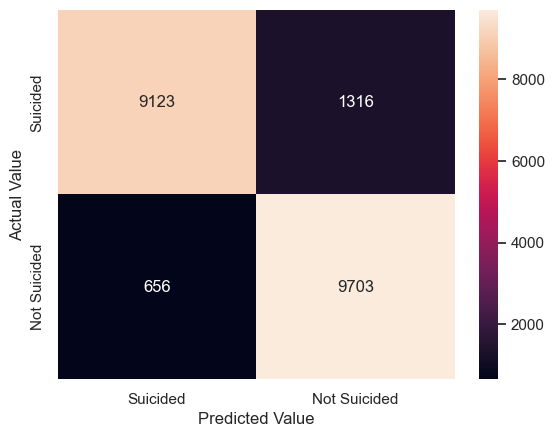

In [17]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
df=pd.DataFrame(cnf_matrix,index=["Suicided", "Not Suicided"],columns=["Suicided","Not Suicided"])
sns.heatmap(df,annot=True, fmt ='g')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")